In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
pd.set_option('display.max_columns', None)

Mounted at /content/gdrive


# Compiling the Data Sets
The Flight Data used in this notebook was downloaded from [this kaggle dataset](https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv).

There are 7.6 GB of flight data across all 10 data sets, which is too much data to process. So, in the sections below, each year's data is sampled and saved to a csv file.

In [2]:
def delayed(x):
  # delayed(np.NaN) returns ""
  if x <= 0:
    return "ONTIME"
  elif x > 0 and x <= 30:
    return "DEL_0_30"
  elif x > 30 and x <= 60:
    return "DEL_30_60"
  elif x > 60:
    return "DEL_60"
  else:
    return ""

def sample(df):
  df["ARR_DELAY"].dropna()
  df["DELAYED"] = df.ARR_DELAY.transform(lambda x: delayed(x))

  n = len(df[df["DIVERTED"] == 1])

  data = [
    df[df["DIVERTED"] == 1],
    df[df["CANCELLED"] == 1].sample(n=n),
    df[df["DELAYED"] == "ONTIME"].sample(n=n),
    df[df["DELAYED"] == "DEL_0_30"].sample(n=n),
    df[df["DELAYED"] == "DEL_30_60"].sample(n=n),
    df[df["DELAYED"] == "DEL_60"].sample(n=n)
  ]

  return pd.concat(data)

In [3]:
frames = [
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2018.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2017.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2016.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2015.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2014.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2013.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2012.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2011.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2010.csv')),
  sample(pd.read_csv('/content/gdrive/MyDrive/flight-delay/2009.csv'))
]

In [4]:
df = pd.concat(frames)
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAYED
1168,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,0.0,NaN,1.0,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN,
1638,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,0.0,NaN,1.0,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,
1643,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,0.0,NaN,1.0,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,
1683,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,0.0,NaN,1.0,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,
1850,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,0.0,NaN,1.0,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969371,2009-12-04,XE,2488,CLT,EWR,1954.0,2339.0,225.0,9.0,2348.0,50.0,10.0,2159.0,100.0,181.0,0.0,NaN,0.0,125.0,81.0,62.0,529.0,0.0,0.0,0.0,0.0,181.0,NaN,DEL_60
2625906,2009-05-29,EV,4993,ATL,EYW,936.0,1206.0,150.0,12.0,1218.0,1340.0,3.0,1135.0,1343.0,128.0,0.0,NaN,0.0,119.0,97.0,82.0,646.0,128.0,0.0,0.0,0.0,0.0,NaN,DEL_60
2363369,2009-05-14,MQ,3752,MLI,DFW,635.0,914.0,159.0,110.0,1104.0,1252.0,9.0,840.0,1301.0,261.0,0.0,NaN,0.0,125.0,227.0,108.0,691.0,159.0,0.0,102.0,0.0,0.0,NaN,DEL_60
2938607,2009-06-15,MQ,4730,RDU,LGA,1550.0,1833.0,163.0,83.0,1956.0,2110.0,10.0,1729.0,2120.0,231.0,0.0,NaN,0.0,99.0,167.0,74.0,431.0,0.0,0.0,222.0,0.0,9.0,NaN,DEL_60


In [5]:
df["DELAYED"].value_counts()

             291114
ONTIME       145557
DEL_0_30     145557
DEL_30_60    145557
DEL_60       145557
Name: DELAYED, dtype: int64

In [6]:
df.to_csv('sampled.csv')
!cp sampled.csv "gdrive/My Drive/flight-delay/"

#Data Exploration & Preprocessing
Visualizing the dataset's influential variables and preparing the dataset to be passed into our Random Forest model.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/flight-delay/sampled.csv')

In [7]:
df['DAY_OF_WEEK'] = pd.to_datetime(df['FL_DATE'], infer_datetime_format=True)
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].apply(lambda x: x.weekday())

df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAYED,DAY_OF_WEEK
1168,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,0.0,NaN,1.0,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1638,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,0.0,NaN,1.0,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1643,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,0.0,NaN,1.0,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1683,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,0.0,NaN,1.0,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1850,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,0.0,NaN,1.0,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969371,2009-12-04,XE,2488,CLT,EWR,1954.0,2339.0,225.0,9.0,2348.0,50.0,10.0,2159.0,100.0,181.0,0.0,NaN,0.0,125.0,81.0,62.0,529.0,0.0,0.0,0.0,0.0,181.0,NaN,DEL_60,4
2625906,2009-05-29,EV,4993,ATL,EYW,936.0,1206.0,150.0,12.0,1218.0,1340.0,3.0,1135.0,1343.0,128.0,0.0,NaN,0.0,119.0,97.0,82.0,646.0,128.0,0.0,0.0,0.0,0.0,NaN,DEL_60,4
2363369,2009-05-14,MQ,3752,MLI,DFW,635.0,914.0,159.0,110.0,1104.0,1252.0,9.0,840.0,1301.0,261.0,0.0,NaN,0.0,125.0,227.0,108.0,691.0,159.0,0.0,102.0,0.0,0.0,NaN,DEL_60,3
2938607,2009-06-15,MQ,4730,RDU,LGA,1550.0,1833.0,163.0,83.0,1956.0,2110.0,10.0,1729.0,2120.0,231.0,0.0,NaN,0.0,99.0,167.0,74.0,431.0,0.0,0.0,222.0,0.0,9.0,NaN,DEL_60,0


In [8]:
sns.set(style="darkgrid")

<Axes: ylabel='ORIGIN'>

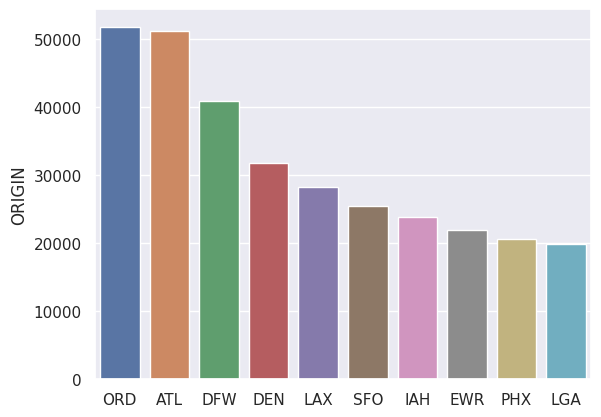

In [9]:
df_Origin = pd.DataFrame(df["ORIGIN"].value_counts().nlargest(n=10))
sns.barplot(x=df_Origin.index, y="ORIGIN", data=df_Origin)

<Axes: ylabel='OP_CARRIER'>

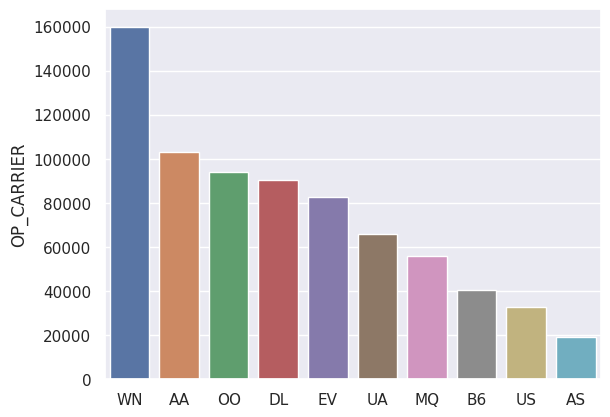

In [10]:
df_Carrier = pd.DataFrame(df["OP_CARRIER"].value_counts().nlargest(n=10))
sns.barplot(x=df_Carrier.index, y="OP_CARRIER", data=df_Carrier)

<Axes: ylabel='DAY_OF_WEEK'>

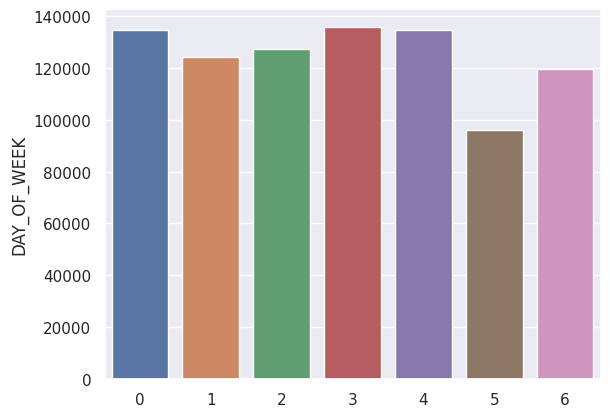

In [11]:
df_Weekday = pd.DataFrame(df["DAY_OF_WEEK"].value_counts())
sns.barplot(x=df_Weekday.index, y="DAY_OF_WEEK", data=df_Weekday)

x <= 0: 140269
0 < x < 30: 149073
30 < x < 60: 144294
x > 60: 148592


[Text(0.5, 0, 'Delays')]

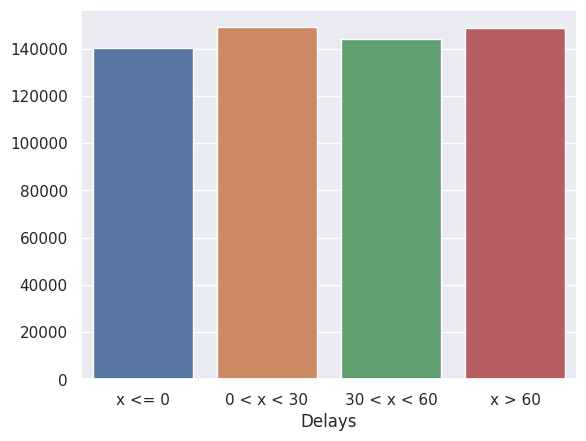

In [12]:
counts = np.histogram(df["ARR_DELAY"].dropna(), bins=np.array([-165, 0, 30, 60, 2475]))[0]
labels = ["x <= 0", "0 < x < 30", "30 < x < 60", "x > 60"]
for i in range(counts.size):
  print(labels[i] + ": " + str(counts[i]))

sns.barplot(x=labels, y=counts).set(xlabel="Delays")

In [13]:
df[df["DIVERTED"] == 1]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAYED,DAY_OF_WEEK
1168,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,0.0,NaN,1.0,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1638,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,0.0,NaN,1.0,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1643,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,0.0,NaN,1.0,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1683,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,0.0,NaN,1.0,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1850,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,0.0,NaN,1.0,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428259,2009-12-31,XE,2382,CLE,DAY,850.0,848.0,-2.0,16.0,904.0,1315.0,4.0,945.0,1319.0,NaN,0.0,NaN,1.0,55.0,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,,3
6428634,2009-12-31,XE,2967,IAH,LBB,900.0,900.0,0.0,25.0,925.0,1150.0,3.0,1038.0,1153.0,NaN,0.0,NaN,1.0,98.0,NaN,NaN,458.0,NaN,NaN,NaN,NaN,NaN,NaN,,3
6428718,2009-12-31,XE,3096,IAH,CMH,740.0,739.0,-1.0,48.0,827.0,1320.0,6.0,1112.0,1326.0,NaN,0.0,NaN,1.0,152.0,NaN,NaN,986.0,NaN,NaN,NaN,NaN,NaN,NaN,,3
6429157,2009-12-31,YV,7058,ORD,ORF,848.0,901.0,13.0,19.0,920.0,NaN,NaN,1145.0,NaN,NaN,0.0,NaN,1.0,117.0,NaN,NaN,717.0,NaN,NaN,NaN,NaN,NaN,NaN,,3


In [14]:
"""
Preprocessing: Transforms and drops cancelled and diverted columns

Boolean values replaced by ONTIME or (DELAYED, CANCELLED, or DIVERTED) for each column
Merges these into a column called FLIGHT_STATUS
"""
df.CANCELLED = df.CANCELLED.transform(lambda x: "CANCELLED" if x == 1.0 else "")
df.DIVERTED = df.DIVERTED.transform(lambda x: "DIVERTED" if x == 1.0 else "")

df.rename({"OP_CARRIER": "AIRLINE"}, axis=1, inplace=True)
df.rename({"OP_CARRIER_FL_NUM": "AIRLINE_FL_NUM"}, axis=1, inplace=True)

df

,FL_DATE,AIRLINE,AIRLINE_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAYED,DAY_OF_WEEK
1168,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,,NaN,DIVERTED,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1638,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,,NaN,DIVERTED,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1643,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,,NaN,DIVERTED,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1683,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,,NaN,DIVERTED,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
1850,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,,NaN,DIVERTED,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969371,2009-12-04,XE,2488,CLT,EWR,1954.0,2339.0,225.0,9.0,2348.0,50.0,10.0,2159.0,100.0,181.0,,NaN,,125.0,81.0,62.0,529.0,0.0,0.0,0.0,0.0,181.0,NaN,DEL_60,4
2625906,2009-05-29,EV,4993,ATL,EYW,936.0,1206.0,150.0,12.0,1218.0,1340.0,3.0,1135.0,1343.0,128.0,,NaN,,119.0,97.0,82.0,646.0,128.0,0.0,0.0,0.0,0.0,NaN,DEL_60,4
2363369,2009-05-14,MQ,3752,MLI,DFW,635.0,914.0,159.0,110.0,1104.0,1252.0,9.0,840.0,1301.0,261.0,,NaN,,125.0,227.0,108.0,691.0,159.0,0.0,102.0,0.0,0.0,NaN,DEL_60,3
2938607,2009-06-15,MQ,4730,RDU,LGA,1550.0,1833.0,163.0,83.0,1956.0,2110.0,10.0,1729.0,2120.0,231.0,,NaN,,99.0,167.0,74.0,431.0,0.0,0.0,222.0,0.0,9.0,NaN,DEL_60,0


In [16]:
df["FLIGHT_STATUS"] = (df.CANCELLED + df.DIVERTED + df.DELAYED)
df.drop(["CANCELLED", "DIVERTED", "DELAYED", "Unnamed: 27"], axis=1, inplace=True)
df = df[df.FLIGHT_STATUS != "CANCELLEDDIVERTED"]
df.FLIGHT_STATUS.value_counts(normalize=True)

ONTIME       0.166670
DEL_0_30     0.166670
DEL_30_60    0.166670
DEL_60       0.166670
CANCELLED    0.166669
DIVERTED     0.166653
Name: FLIGHT_STATUS, dtype: float64

In [20]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DAY_OF_WEEK,FLIGHT_STATUS
1168,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,NaN,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
1638,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,NaN,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
1643,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,NaN,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
1683,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,NaN,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
1850,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,NaN,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED


In [22]:
# Export Cleaned Data to Drive
df.to_csv('cleaned.csv')
!cp cleaned.csv "gdrive/My Drive/flight-delay/"

# Adding Origin and Destination Data

One way to add origin and destination data to our model while avoiding the issue of one-hot encoding (there will be too many columns) is to use the corresponding latitude and longitude data for each of the origin/destination airports.


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/flight-delay/cleaned.csv')

<ipython-input-3-1cca5029b7ca>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/flight-delay/cleaned.csv')


In [4]:
df

,Unnamed: 0,FL_DATE,AIRLINE,AIRLINE_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DAY_OF_WEEK,FLIGHT_STATUS
0,1168,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,NaN,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
1,1638,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,NaN,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
2,1643,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,NaN,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
3,1683,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,NaN,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
4,1850,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,NaN,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873321,5969371,2009-12-04,XE,2488,CLT,EWR,1954.0,2339.0,225.0,9.0,2348.0,50.0,10.0,2159.0,100.0,181.0,NaN,125.0,81.0,62.0,529.0,0.0,0.0,0.0,0.0,181.0,4,DEL_60
873322,2625906,2009-05-29,EV,4993,ATL,EYW,936.0,1206.0,150.0,12.0,1218.0,1340.0,3.0,1135.0,1343.0,128.0,NaN,119.0,97.0,82.0,646.0,128.0,0.0,0.0,0.0,0.0,4,DEL_60
873323,2363369,2009-05-14,MQ,3752,MLI,DFW,635.0,914.0,159.0,110.0,1104.0,1252.0,9.0,840.0,1301.0,261.0,NaN,125.0,227.0,108.0,691.0,159.0,0.0,102.0,0.0,0.0,3,DEL_60
873324,2938607,2009-06-15,MQ,4730,RDU,LGA,1550.0,1833.0,163.0,83.0,1956.0,2110.0,10.0,1729.0,2120.0,231.0,NaN,99.0,167.0,74.0,431.0,0.0,0.0,222.0,0.0,9.0,0,DEL_60


In [6]:
df[["ORIGIN", "DEST"]].nunique()

ORIGIN    376
DEST      373
dtype: int64

In [7]:
airports = pd.read_csv('/content/gdrive/MyDrive/flight-delay/airports.csv')
airports.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


However, as can be seen in the cells below, not all of the airport data are contained within this csv file. So, if we tried to incorporate the latitude and longitude data for each origin / destination, then this would lead to many NaN entries. Next steps include finding a dataset that contains all of the possible airport data. However, for now, we will drop these values.

In [8]:
df["ORIGIN"].isin(airports["IATA"]).value_counts()

True     871961
False      1365
Name: ORIGIN, dtype: int64

In [9]:
df["DEST"].isin(airports["IATA"]).value_counts()

True     871784
False      1542
Name: DEST, dtype: int64

In [10]:
df["ORIGIN_exists"] = df["ORIGIN"].isin(airports["IATA"])

In [11]:
df["DEST_exists"] = df["DEST"].isin(airports["IATA"])

In [12]:
df = df.loc[df.ORIGIN_exists == True]
df = df.loc[df.DEST_exists == True]

In [13]:
df["ORIGIN"].isin(airports["IATA"]).value_counts()

True    870550
Name: ORIGIN, dtype: int64

In [14]:
df["DEST"].isin(airports["IATA"]).value_counts()

True    870550
Name: DEST, dtype: int64

In [15]:
df = df.drop(["ORIGIN_exists", "DEST_exists", "Unnamed: 0"], axis=1)
df.head()

,FL_DATE,AIRLINE,AIRLINE_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DAY_OF_WEEK,FLIGHT_STATUS
0,2018-01-01,UA,555,SFO,SAN,729.0,718.0,-11.0,17.0,735.0,1124.0,3.0,903.0,1127.0,NaN,NaN,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
1,2018-01-01,AS,64,PSG,WRG,1514.0,1626.0,72.0,20.0,1646.0,NaN,NaN,1538.0,NaN,NaN,NaN,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
2,2018-01-01,AS,65,KTN,WRG,925.0,918.0,-7.0,26.0,944.0,NaN,NaN,1011.0,NaN,NaN,NaN,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
3,2018-01-01,AS,120,SEA,SAN,550.0,544.0,-6.0,18.0,602.0,1046.0,3.0,840.0,1049.0,NaN,NaN,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED
4,2018-01-01,AS,512,SEA,SAN,725.0,722.0,-3.0,16.0,738.0,1216.0,3.0,1017.0,1219.0,NaN,NaN,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN,0,DIVERTED


In [16]:
lats = airports.set_index('IATA').to_dict()['LATITUDE']
longs = airports.set_index('IATA').to_dict()['LONGITUDE']

df["OLAT"] = df["ORIGIN"].map(lats)
df["OLONG"] = df["ORIGIN"].map(longs)
df["DLAT"] = df["DEST"].map(lats)
df["DLONG"] = df["DEST"].map(longs)

df = df.loc[:, ['DAY_OF_WEEK', 'AIRLINE', 'DISTANCE', 'DEP_DELAY', 'FLIGHT_STATUS', 'OLAT', 'OLONG', 'DLAT', 'DLONG']]

df.head()

,DAY_OF_WEEK,AIRLINE,DISTANCE,DEP_DELAY,FLIGHT_STATUS,OLAT,OLONG,DLAT,DLONG
0,0,UA,447.0,-11.0,DIVERTED,37.619002,-122.374843,32.733556,-117.189657
1,0,AS,31.0,72.0,DIVERTED,56.801652,-132.945278,56.484326,-132.369824
2,0,AS,82.0,-7.0,DIVERTED,55.355569,-131.713740,56.484326,-132.369824
3,0,AS,1050.0,-6.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657
4,0,AS,1050.0,-3.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657


# Formatting the Cleaned Data

Before we can use the cleaned data, we must take into account the type of model we are using. With random forest classification trees in sklearn, you cannot use variables with multiple types of categorical data, such as possible airlines or day of the week, as an input. 

Thus, we must convert each categorical variable into dummy variables using one-hot encoding.

> i.e. For each day of the week (0-6), we must create a column named "DAY_OF_WEEK_{INSERT DAY}" and each row will have a 1 if the flight was on that day and a 0 if it was not 

Note: Do not attempt to add the origin and destination variables to the model using one-hot encoding, as each have ~350 possible locations and this will add 700 columns to the data frame. (700 x 580k more entries!!!) This severely slowed the model, which is why latitude and longitude data was used instead.

In [17]:
# Replace All Cancelled flight's NaN Departure Delay Data
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)

# Convert day of week numbers to strings for more readable col names later on
df.loc[df[df.DAY_OF_WEEK == 0].index,'DAY_OF_WEEK'] = "MON"
df.loc[df[df.DAY_OF_WEEK == 1].index,'DAY_OF_WEEK'] = "TUE"
df.loc[df[df.DAY_OF_WEEK == 2].index,'DAY_OF_WEEK'] = "WED"
df.loc[df[df.DAY_OF_WEEK == 3].index,'DAY_OF_WEEK'] = "THU"
df.loc[df[df.DAY_OF_WEEK == 4].index,'DAY_OF_WEEK'] = "FRI"
df.loc[df[df.DAY_OF_WEEK == 5].index,'DAY_OF_WEEK'] = "SAT"
df.loc[df[df.DAY_OF_WEEK == 6].index,'DAY_OF_WEEK'] = "SUN"

df.head()

,DAY_OF_WEEK,AIRLINE,DISTANCE,DEP_DELAY,FLIGHT_STATUS,OLAT,OLONG,DLAT,DLONG
0,MON,UA,447.0,-11.0,DIVERTED,37.619002,-122.374843,32.733556,-117.189657
1,MON,AS,31.0,72.0,DIVERTED,56.801652,-132.945278,56.484326,-132.369824
2,MON,AS,82.0,-7.0,DIVERTED,55.355569,-131.713740,56.484326,-132.369824
3,MON,AS,1050.0,-6.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657
4,MON,AS,1050.0,-3.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657


In [18]:
# One-Hot Encoding
dums = ["DAY_OF_WEEK", "AIRLINE"]
cols = pd.get_dummies(df[dums])
cols.head()

,DAY_OF_WEEK_FRI,DAY_OF_WEEK_MON,DAY_OF_WEEK_SAT,DAY_OF_WEEK_SUN,DAY_OF_WEEK_THU,DAY_OF_WEEK_TUE,DAY_OF_WEEK_WED,AIRLINE_9E,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_CO,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_FL,AIRLINE_G4,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_NW,AIRLINE_OH,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,AIRLINE_XE,AIRLINE_YV,AIRLINE_YX
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df.shape

(870550, 9)

In [20]:
cols.shape

(870550, 30)

In [21]:
df.head()

,DAY_OF_WEEK,AIRLINE,DISTANCE,DEP_DELAY,FLIGHT_STATUS,OLAT,OLONG,DLAT,DLONG
0,MON,UA,447.0,-11.0,DIVERTED,37.619002,-122.374843,32.733556,-117.189657
1,MON,AS,31.0,72.0,DIVERTED,56.801652,-132.945278,56.484326,-132.369824
2,MON,AS,82.0,-7.0,DIVERTED,55.355569,-131.713740,56.484326,-132.369824
3,MON,AS,1050.0,-6.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657
4,MON,AS,1050.0,-3.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657


In [22]:
df.drop(dums, axis=1, inplace=True)
df.head()

,DISTANCE,DEP_DELAY,FLIGHT_STATUS,OLAT,OLONG,DLAT,DLONG
0,447.0,-11.0,DIVERTED,37.619002,-122.374843,32.733556,-117.189657
1,31.0,72.0,DIVERTED,56.801652,-132.945278,56.484326,-132.369824
2,82.0,-7.0,DIVERTED,55.355569,-131.713740,56.484326,-132.369824
3,1050.0,-6.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657
4,1050.0,-3.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657


In [23]:
df = pd.concat([df,cols], axis=1)
df.head()

,DISTANCE,DEP_DELAY,FLIGHT_STATUS,OLAT,OLONG,DLAT,DLONG,DAY_OF_WEEK_FRI,DAY_OF_WEEK_MON,DAY_OF_WEEK_SAT,DAY_OF_WEEK_SUN,DAY_OF_WEEK_THU,DAY_OF_WEEK_TUE,DAY_OF_WEEK_WED,AIRLINE_9E,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_CO,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_FL,AIRLINE_G4,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_NW,AIRLINE_OH,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,AIRLINE_XE,AIRLINE_YV,AIRLINE_YX
0,447.0,-11.0,DIVERTED,37.619002,-122.374843,32.733556,-117.189657,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,31.0,72.0,DIVERTED,56.801652,-132.945278,56.484326,-132.369824,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,82.0,-7.0,DIVERTED,55.355569,-131.713740,56.484326,-132.369824,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1050.0,-6.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1050.0,-3.0,DIVERTED,47.448982,-122.309313,32.733556,-117.189657,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Export Preprocessed Data to Drive
df.to_csv('preprocessed.csv')
!cp preprocessed.csv "gdrive/My Drive/flight-delay/"

# Building the Model
A Random Forest Classification Model that predicts whether a flight is ONTIME, DELAYED, CANCELLED, or DIVERTED.

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/flight-delay/preprocessed.csv')

In [5]:
x_data = df.drop('FLIGHT_STATUS', axis=1)
y_data = df['FLIGHT_STATUS']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=5)
# x_val, x_test, y_val, y_test = train_test_split(x_other, y_other, train_size=0.5, random_state=5)

In [ ]:
model = RandomForestClassifier(max_depth=15, min_samples_leaf=500, oob_score=True, random_state=5)
model.fit(x_train, y_train)

In [30]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 500,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [16]:
# Creating the random hyperparamaterization grid for cross validation
n_estimators = [x for x in range(100, 251, 50)]              # num trees in forest
max_features = ['auto', 'sqrt']                              # num of features to consider at each split
max_depth = [x for x in range(10, 110, 10)]                  # max depth of the trees
max_depth.append(None)
min_samples_split = [2, 5, 10]                               # min number of samples needed to split a node
min_samples_leaf = [1, 2, 4]                                 # min number of samples required at each node
bootstrap = [True, False]                                    # Method of selecting samples for training each tree

grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}


In [17]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
val_model = RandomizedSearchCV(estimator = rf, param_distributions = grid, 
                               n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
val_model.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 250]},
                   random_state=42, verbose=2)

In [18]:
val_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [22]:
# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

best_rand = val_model.best_estimator_
y_pred = best_rand.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   CANCELLED       0.87      0.96      0.91     43496
    DEL_0_30       0.60      0.58      0.59     43949
   DEL_30_60       0.70      0.75      0.73     43477
      DEL_60       0.85      0.85      0.85     43334
    DIVERTED       0.65      0.43      0.52     43438
      ONTIME       0.61      0.74      0.67     43471

    accuracy                           0.72    261165
   macro avg       0.71      0.72      0.71    261165
weighted avg       0.71      0.72      0.71    261165



In [23]:
import joblib

joblib.dump(best_rand, 'model.joblib')
!cp model.joblib "gdrive/My Drive/flight-delay/"

In [24]:
final_model = joblib.load('/content/gdrive/MyDrive/flight-delay/v4.joblib')
y_pred = final_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   CANCELLED       0.87      0.96      0.91     43496
    DEL_0_30       0.60      0.58      0.59     43949
   DEL_30_60       0.70      0.75      0.73     43477
      DEL_60       0.85      0.85      0.85     43334
    DIVERTED       0.65      0.43      0.52     43438
      ONTIME       0.61      0.74      0.67     43471

    accuracy                           0.72    261165
   macro avg       0.71      0.72      0.71    261165
weighted avg       0.71      0.72      0.71    261165

